### import data

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_path = '/home/vlad/.data/titanic/'

In [4]:
!ls /home/vlad/.data/titanic

gender_submission.csv  test.csv  train.csv


In [5]:
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')

In [6]:
passenger_id = test.PassengerId

In [7]:
print("shape of train set: {}".format(train.shape))
for x in train.columns:
    print(x, end=',')
print()
train.info()

shape of train set: (891, 12)
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
print("shape of test set: {}".format(test.shape))
for x in train.columns:
    print(x, end=',')
print()
test.info()

shape of test set: (418, 11)
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,NaN,S
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S
721,722,0,3,"Jensen, Mr. Svend Lauritz",male,17.0,1,0,350048,7.0542,NaN,S


In [11]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [12]:
missing_percentage(train)[missing_percentage(train)['Total'] != 0]

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


In [13]:
missing_percentage(test)[missing_percentage(test)['Total'] != 0]

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24


In [14]:
def percent_value_count(df, feature):
    percent = pd.DataFrame(round(df.loc[:, feature].value_counts(dropna=False, normalize=True) * 100, 2))
    total = pd.DataFrame(df.loc[:, feature].value_counts())
    
    percent.columns=['percent']
    total.columns=['Total']
    return pd.concat([total, percent], axis=1)

In [15]:
percent_value_count(train, 'Sex')

,Total,percent
male,577,64.76
female,314,35.24


In [16]:
for feature in train.columns:
    print('{0} - rows = {1[0]}, columns = {1[1]}'.format("{:<12}".format(feature), percent_value_count(train, feature).shape))

PassengerId  - rows = 891, columns = 2
Survived     - rows = 2, columns = 2
Pclass       - rows = 3, columns = 2
Name         - rows = 891, columns = 2
Sex          - rows = 2, columns = 2
Age          - rows = 89, columns = 2
SibSp        - rows = 7, columns = 2
Parch        - rows = 7, columns = 2
Ticket       - rows = 681, columns = 2
Fare         - rows = 248, columns = 2
Cabin        - rows = 148, columns = 2
Embarked     - rows = 4, columns = 2


/home/vlad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [17]:
for feature in test.columns:
    print('{0} - rows = {1[0]}, columns = {1[1]}'.format("{:<12}".format(feature), percent_value_count(test, feature).shape))

PassengerId  - rows = 418, columns = 2
Pclass       - rows = 3, columns = 2
Name         - rows = 418, columns = 2
Sex          - rows = 2, columns = 2
Age          - rows = 80, columns = 2
SibSp        - rows = 7, columns = 2
Parch        - rows = 8, columns = 2
Ticket       - rows = 363, columns = 2
Fare         - rows = 170, columns = 2
Cabin        - rows = 77, columns = 2
Embarked     - rows = 3, columns = 2


/home/vlad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [18]:
percent_value_count(train, 'Sex')

,Total,percent
male,577,64.76
female,314,35.24


In [19]:
percent_value_count(train, 'SibSp')

,Total,percent
0,608,68.24
1,209,23.46
2,28,3.14
4,18,2.02
3,16,1.80
8,7,0.79
5,5,0.56


In [20]:
percent_value_count(train, 'Parch')

,Total,percent
0,678,76.09
1,118,13.24
2,80,8.98
5,5,0.56
3,5,0.56
4,4,0.45
6,1,0.11


In [21]:
pd.concat([percent_value_count(train, 'Parch'), percent_value_count(train, 'SibSp')], axis=1)

,Total,percent,Total,percent
0,678.0,76.09,608.0,68.24
1,118.0,13.24,209.0,23.46
2,80.0,8.98,28.0,3.14
3,5.0,0.56,16.0,1.80
4,4.0,0.45,18.0,2.02
5,5.0,0.56,5.0,0.56
6,1.0,0.11,NaN,NaN
8,NaN,NaN,7.0,0.79


In [22]:
percent_value_count(train, 'Embarked')

/home/vlad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,Total,percent
C,168.0,18.86
Q,77.0,8.64
S,644.0,72.28
NaN,NaN,0.22


In [23]:
percent_value_count(train, 'Pclass')

,Total,percent
3,491,55.11
1,216,24.24
2,184,20.65


In [24]:
train['Sex'] = train.Sex.apply(lambda x: 0 if x == 'male' else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == 'male' else 1)

In [25]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [26]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)
drop_column = ['Passe0ngerId', 'Cabin', 'Ticket', 'Name']
train.drop(drop_column, axis=1, inplace=True)
test.drop(drop_column, axis=1, inplace=True)
print(train.isna().sum())
print(test.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [27]:
print(train.shape)
train.info()

(891, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [28]:
print(test.shape)
test.info()

(418, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(4), object(1)
memory usage: 22.9+ KB


In [29]:
percent_value_count(train, 'Embarked')

,Total,percent
S,646,72.50
C,168,18.86
Q,77,8.64


In [30]:
percent_value_count(test, 'Embarked')

,Total,percent
S,270,64.59
C,102,24.40
Q,46,11.00


In [31]:
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [32]:
train.shape, test.shape

((891, 8), (418, 7))

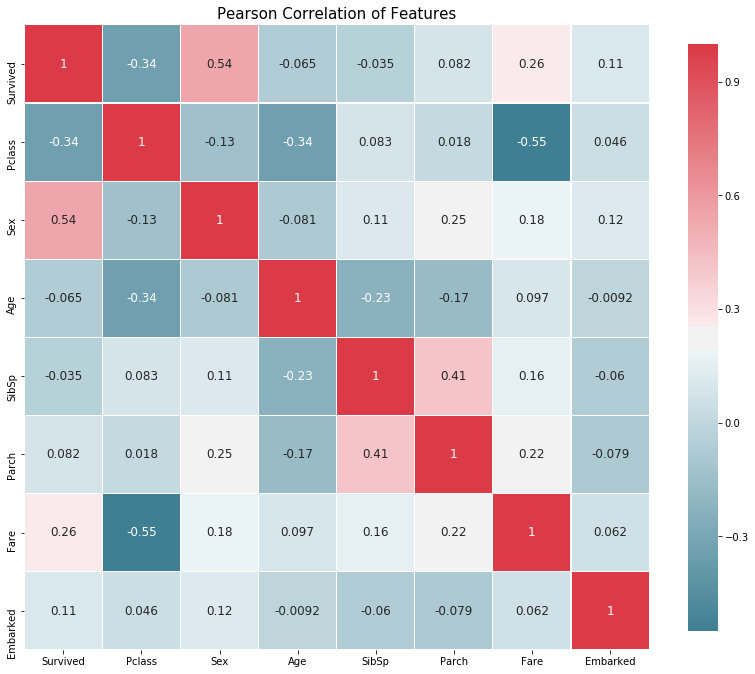

In [33]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

In [34]:
datasets = [train, test]

In [35]:
percent_value_count(train, 'Parch')

,Total,percent
0,678,76.09
1,118,13.24
2,80,8.98
5,5,0.56
3,5,0.56
4,4,0.45
6,1,0.11


In [36]:
for dataset in datasets:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    
    dataset['Fare/Pclass'] = dataset['Fare'] / dataset['Pclass']
    dataset['Sex/Parch'] = (dataset['Sex'] + 0.1) / (dataset['Parch'] + 0.1)
    dataset['Pclass/Age'] = dataset['Pclass'] / dataset['Age']
    dataset['Parch/Fare'] = (dataset['Parch'] + 0.1) / (dataset['Fare'] + 0.1)
    dataset['SibSp/Age'] = dataset['SibSp'] / dataset['Age']

/home/vlad/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


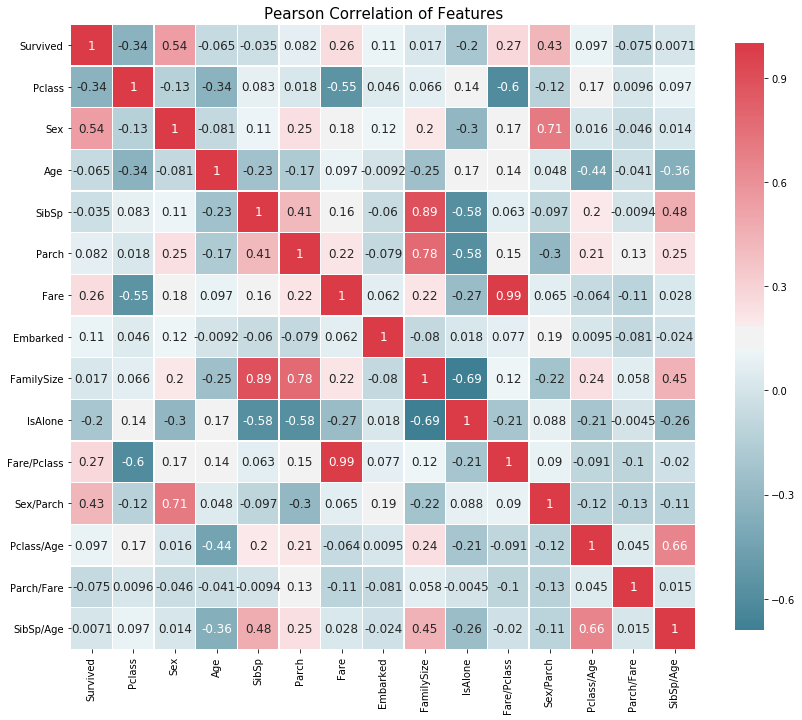

In [37]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

In [38]:
for dataset in datasets:
    drop_column = ['Age', 'SibSp', 'Parch', 'FamilySize']
    dataset.drop(drop_column, axis=1, inplace=True)

In [39]:
def scaling(df):
    for feature in df.columns:
        if str(df.columns) == 'Fare':
            df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()
        else:
            df[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())

In [40]:
scaling(train); scaling(test)

In [41]:
train.describe()

,Survived,Pclass,Sex,Fare,Embarked,IsAlone,Fare/Pclass,Sex/Parch,Pclass/Age,Parch/Fare,SibSp/Age
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.352413,0.062858,0.180696,0.602694,0.048888,0.275570,0.021383,0.037310,0.013615
std,0.486592,0.418036,0.477990,0.096995,0.317837,0.489615,0.100025,0.383344,0.061628,0.130071,0.063817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.015440,0.000000,0.000000,0.005156,0.089286,0.004848,0.005331,0.000000
50%,0.000000,1.000000,0.000000,0.028213,0.000000,1.000000,0.012346,0.089286,0.011395,0.012077,0.000000
75%,1.000000,1.000000,1.000000,0.060508,0.500000,1.000000,0.045251,0.089286,0.014429,0.013785,0.005556
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
print(train.isna().sum())
print(test.isna().sum())

Survived       0
Pclass         0
Sex            0
Fare           0
Embarked       0
IsAlone        0
Fare/Pclass    0
Sex/Parch      0
Pclass/Age     0
Parch/Fare     0
SibSp/Age      0
dtype: int64
Pclass         0
Sex            0
Fare           0
Embarked       0
IsAlone        0
Fare/Pclass    0
Sex/Parch      0
Pclass/Age     0
Parch/Fare     0
SibSp/Age      0
dtype: int64


In [43]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [44]:
X.shape, y.shape

((891, 10), (891,))

In [45]:
test.shape

(418, 10)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn import model_selection
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_absolute_error

In [48]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_err = mean_absolute_error(lin_reg_model.predict(X_test), y_test)
print(lin_reg_err)

0.3005346208218978


In [49]:
tree_reg_model = DecisionTreeClassifier()
tree_reg_model.fit(X_train, y_train)
tree_reg_err = mean_absolute_error(tree_reg_model.predict(X_test), y_test)
print(tree_reg_err)

0.24581005586592178


In [50]:
log_reg_model = LogisticRegression(solver='liblinear')
log_reg_model.fit(X_train, y_train)
log_reg_err = mean_absolute_error(log_reg_model.predict(X_test), y_test)
print(log_reg_err)

0.21787709497206703


In [51]:
from sklearn.linear_model import LogisticRegressionCV

In [52]:
cs_list = [5, 10, 15, 20, 25]
tol_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
solvers = ['liblinear']
penaltys = ['l1', 'l2']
best_log_regcv_model = None
best_log_regcv_err = 1
for cs in cs_list:
    for tol in tol_list:
        for solver in solvers:
            for penalty in penaltys:
                log_regcv_model = LogisticRegressionCV(solver=solver, penalty=penalty, Cs=cs, tol=tol, max_iter=1000)
                log_regcv_model.fit(X_train, y_train)
                log_regcv_err = mean_absolute_error(log_regcv_model.predict(X_test), y_test)

                if log_regcv_err < best_log_regcv_err:
                    best_log_regcv_err = log_regcv_err
                    best_log_regcv_model = log_regcv_model

/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of 

/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of 

In [53]:
print("error - ", best_log_regcv_err, best_log_regcv_model, " score - ", best_log_regcv_model.score(X_test, y_test))

error -  0.20670391061452514 LogisticRegressionCV(Cs=5, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='liblinear',
           tol=0.01, verbose=0)  score -  0.7932960893854749


In [54]:
from sklearn.svm import SVC

In [55]:
c_list = [0.1, 0.3, 1, 3]
degree_list = [1, 2, 3, 4]
tol_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
best_svc_model = None
best_svc_err = 1
for c in c_list:
    for degree in degree_list:
        for tol in tol_list:
            svc_model = SVC(C=c, degree=degree, tol=tol, max_iter=1000)
            svc_model.fit(X_train, y_train)
            svc_err = mean_absolute_error(svc_model.predict(X_test), y_test)
            
            if svc_err < best_svc_err:
                best_svc_err = svc_err
                best_svc_model = svc_model

/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/svm/

/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/svm/

/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/svm/

In [56]:
print("error - ", best_svc_err, best_svc_model, " score - ", best_svc_model.score(X_test, y_test))

error -  0.22346368715083798 SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
  kernel='rbf', max_iter=1000, probability=False, random_state=None,
  shrinking=True, tol=1e-06, verbose=False)  score -  0.776536312849162


In [57]:
from sklearn.linear_model import RidgeClassifier

In [58]:
alphas = [1e-3, 1e-2, 1e-1, 1, 10]
solvers = ['cholesky', 'svd', 'lsqr']
tol_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
best_log_reg_model = None
best_log_reg_err = 1
for alpha in alphas:
    for tol in tol_list:
        for solver in solvers:
            log_reg_model = RidgeClassifier(alpha=alpha, tol=tol, solver=solver, max_iter=1000)
            log_reg_model.fit(X_train, y_train)
            log_reg_err = mean_absolute_error(log_reg_model.predict(X_test), y_test)

            if log_reg_err < best_log_reg_err:
                best_log_reg_err = log_reg_err
                best_log_reg_model = log_reg_model

In [59]:
print("error - ", best_log_reg_err, best_log_reg_model, " score - ", best_log_reg_model.score(X_test, y_test))

error -  0.20670391061452514 RidgeClassifier(alpha=0.001, class_weight=None, copy_X=True,
        fit_intercept=True, max_iter=1000, normalize=False,
        random_state=None, solver='cholesky', tol=1e-06)  score -  0.7932960893854749


In [60]:
from sklearn.linear_model import RidgeClassifierCV

In [61]:
alphas = [1e-3, 1e-2, 1e-1, 1, 10]
ridge_classcv_model = RidgeClassifierCV(alphas=alphas)
ridge_classcv_model.fit(X_train, y_train)
ridge_classcv_err = mean_absolute_error(ridge_classcv_model.predict(X_test), y_test)

In [62]:
print("error - ", ridge_classcv_err, ridge_classcv_model, " score - ", ridge_classcv_model.score(X_test, y_test))

error -  0.2122905027932961 RidgeClassifierCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
         class_weight=None, cv=None, fit_intercept=True, normalize=False,
         scoring=None, store_cv_values=False)  score -  0.7877094972067039


In [63]:
alphas = [1e-5, 3 * 1e-4, 1e-4, 3 * 1e-3, 1e-3, 3 * 1e-2, 1e-2]
ridge_classcv_model = RidgeClassifierCV(alphas=alphas, cv='warn',)
ridge_classcv_model.fit(X_train, y_train)
ridge_classcv_err = mean_absolute_error(ridge_classcv_model.predict(X_test), y_test)

/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [64]:
print("error - ", ridge_classcv_err, ridge_classcv_model, " score - ", ridge_classcv_model.score(X_test, y_test))

error -  0.20670391061452514 RidgeClassifierCV(alphas=array([1.e-05, 3.e-04, 1.e-04, 3.e-03, 1.e-03, 3.e-02, 1.e-02]),
         class_weight=None, cv='warn', fit_intercept=True, normalize=False,
         scoring=None, store_cv_values=False)  score -  0.7932960893854749


In [65]:
from sklearn.svm import LinearSVC

In [66]:
c_list = [0.1, 0.3, 1, 3]
tol_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
best_linear_svc_model = None
best_linear_svc_err = 1
for tol in tol_list:
    for c in c_list:
        linear_svc_model = LinearSVC(C=c, tol=tol, max_iter=10000)
        linear_svc_model.fit(X_train, y_train)
        linear_svc_err = mean_absolute_error(log_reg_model.predict(X_test), y_test)

        if log_reg_err < best_log_reg_err:
            best_log_reg_err = log_reg_err
            best_log_reg_model = log_reg_model

In [67]:
print("error - ", best_log_reg_err, best_log_reg_model, " score - ", best_log_reg_model.score(X_test, y_test))

error -  0.20670391061452514 RidgeClassifier(alpha=0.001, class_weight=None, copy_X=True,
        fit_intercept=True, max_iter=1000, normalize=False,
        random_state=None, solver='cholesky', tol=1e-06)  score -  0.7932960893854749


In [68]:
errors = [lin_reg_err, tree_reg_err, log_reg_err, best_log_regcv_err, best_svc_err, ridge_classcv_err, best_log_reg_err, best_log_reg_err]
models = [lin_reg_model, tree_reg_model, log_reg_model, best_log_regcv_model, best_svc_model, ridge_classcv_model, best_log_reg_model, best_log_reg_model]

In [69]:
err = errors[0]
model = models[0]
for i in range(len(errors)):
    if err > errors[i]:
        err = errors[i]
        model = models[i]
print("err - ", err, " model - ", model, " score - ", model.score(X_test, y_test))

err -  0.20670391061452514  model -  LogisticRegressionCV(Cs=5, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='liblinear',
           tol=0.01, verbose=0)  score -  0.7932960893854749


In [70]:
from sklearn.metrics import classification_report
print(classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84       119
         1.0       0.66      0.80      0.72        60

   micro avg       0.79      0.79      0.79       179
   macro avg       0.77      0.79      0.78       179
weighted avg       0.81      0.79      0.80       179



In [71]:
train.shape, test.shape

((891, 11), (418, 10))

In [72]:
train_data = train.as_matrix()
test_data = test.as_matrix()
X_train = train_data[100:, 1:]
y_train = train_data[100:, :1]
y_train = np.reshape(y_train, -1)
X_val = train_data[:100, 1:]
y_val = train_data[:100, :1]
y_val = np.reshape(y_val, -1)
X_test = test_data
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)

Train data shape:  (791, 10)
Train labels shape:  (791,)
Validation data shape:  (100, 10)
Validation labels shape:  (100,)
Test data shape:  (418, 10)


/home/vlad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/vlad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [73]:
def run_model(session, predict, loss_val, Xd, yd,
             epochs, batch_size=64, print_every=100,
             training=None, plot_losses=False):
    # have tensorflow compute accuracy
    correct_prediction = tf.equal(tf.argmax(predict, 1), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # shuffle indicies
    train_indicies = np.arange(Xd.shape[0])
    
    training_now = training is not None
    
    # setting up variavles we want to compute (and optimizing)
    # if we have a training function, add that to things we compute
    variables = [cost_op, correct_prediction, accuracy]
    if training_now:
        variables[-1] = training
        
    iter_cnt = 0
    for e in np.arange(epochs):
        correct = 0
        losses = []
        # make sure we iterate over the dataset once
        for i in np.arange(int(math.ceil(Xd.shape[0]/batch_size))):
            start_idx = (i * batch_size) % Xd.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
            
            feed_dict = {
                x: Xd[idx,:],
                y: yd[idx],
                is_training: training_now
            }
            actual_batch_size = yd[idx].shape[0]
            loss, corr, _ = session.run(variables, feed_dict=feed_dict)
            losses.append(loss * actual_batch_size)
            correct += np.sum(corr)
            
            if training_now and (iter_cnt % print_every) == 0:
                print("Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                     .format(iter_cnt, loss, np.sum(corr) / actual_batch_size))
            iter_cnt += 1
        total_correct = correct / Xd.shape[0]
        total_loss = np.sum(losses) / Xd.shape[0]
        print("Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"\
             .format(total_loss, total_correct, e + 1))
        if plot_losses and (e == epochs - 1):
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()
    return total_loss, total_correct

In [74]:
num_features = X_train.shape[1]; num_labels=2
num_features

10

In [75]:
import tensorflow as tf

### CREATING PLACEHOLDERS AND INITIALIZATIONS:

Placeholders: Here we need two placeholders for input X and output y respectively. A graph can be parameterized to accept external inputs, known as placeholders. A placeholder is a promise to provide a value later.

Lambda: Regularization Parameter. Avoids overfitting. Start with 0.001 value and increase or decrease it accordingly.

Learning Rate: In training deep networks, it is usually helpful to anneal the learning rate over time. Good intuition to have in mind is that with a high learning rate, the system contains too much kinetic energy and the parameter vector bounces around chaotically, unable to settle down into deeper, but narrower parts of the loss function.

In [77]:
# clear old variables
# tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, num_features])
y = tf.placeholder(tf.int64, None)
is_training = tf.placeholder(tf.bool)
_lambda = 0.005 # regularization parameter
learning_rate = tf.train.exponential_decay(learning_rate= 1e-2, 
                                          global_step= 1,
                                          decay_steps= X_train.shape[0],
                                          decay_rate= 0.95,
                                          staircase= True)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [ ]:
# logistic regression 
def titanic_model(x, y, is_training):
    weights = tf.get_variable('weights', shape= [num_features, num_labels])
    bias = tf.get_variable('bias', shape= [num_labels])
    y_out = tf.matmul(x, weights) + bias
    return (y_out, weights)
y_out, weights = titanic_model(x, y, is_training)

In [ ]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits
                     (labels= tf.one_hot(y, 2), logits= y_out))
regularizer = tf.nn.l2_loss(weights)
cost_op = tf.reduce_mean(loss + _lambda * regularizer)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_step = optimizer.minimize(cost_op)

In [ ]:
# prediction 
prediction = tf.argmax(y_out, 1)

In [ ]:
# start a session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
print('Training')
run_model(session=sess, 
          predict=y_out, 
          loss_val=cost_op, 
          Xd=X_train, 
          yd=y_train, 
          epochs=1000, 
          print_every=100, 
          batch_size=50, 
          training=train_step, 
          plot_losses=True)
print('Validation')
run_model(session=sess, 
          predict=y_out, 
          loss_val=cost_op, 
          Xd=X_val, 
          yd=y_val, 
          epochs=1000, 
          batch_size=50,
          print_every=100,
          plot_losses=True)

In [ ]:
from sklearn import metrics

predicted_vallabels = np.zeros(X_val.shape[0])
for i in np.arange(0,X_val.shape[0]/50,dtype=np.int64):
    start = i*50
    end = (i+1)*50
    predicted_vallabels[start:end] = sess.run(prediction,feed_dict={x: X_val[start:end,:],y: predicted_vallabels[start:end],is_training: False})
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = metrics.roc_curve(y_val, predicted_vallabels)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predicted_labels = np.zeros(X_test.shape[0])
for i in np.arange(0,X_test.shape[0]/50,dtype=np.int64):
    start = i*50
    end = (i+1)*50
    predicted_labels[start:end] = sess.run(prediction,feed_dict={x: X_test[start:end,:],y: predicted_labels[start:end],is_training: False})

In [ ]:
!ls /home/vlad/.data/titanic

In [ ]:
testID=pd.read_csv('/home/vlad/.data/titanic/gender_submission.csv')
print(testID.shape)
PassengerId = testID['PassengerId']

In [ ]:
np.savetxt('submission.csv', 
           np.c_[PassengerId,predicted_labels], 
           delimiter=',', 
           header = 'PassengerId,Survived', 
           comments = '', 
           fmt='%d')

In [ ]:
!kaggle competitions submit -c titanic -f submission.csv -m "LogReg with tf#4"